<a href="https://colab.research.google.com/github/pedrohcr16/Bibliotecas-Python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Crie um data frame pandas com 1000 amostras em cada uma das seguintes colunas**:

  1.Idade: números inteiros aleatórios entre 0 e 100 (inlusos).

  2.Data: datas aleatórias entre 01/01/2000 até 31/01/2000.

  3.Nota: Números decimais entre 0 e 1000.

  4.Sexo: Valores aleatórios entre M ou F.

  5.Estado: Valores aleatórios entre os Estados do Brasil.

In [ ]:
import numpy as np
import pandas as pd



In [ ]:
seed = 0
amostras = 1000
np.random.seed(seed)
datas = pd.date_range('2000-01-01', '2000-01-31')
df = pd.DataFrame({
    'idade': np.random.randint(0, 101, amostras),
    'data': np.random.choice(datas, amostras),
    'nota': np.random.randint(0, 1001, amostras),
    'sexo': np.random.choice(['M', 'F'], amostras),
    'estado': np.random.choice(['SP', 'RJ', 'MG','ES'],amostras)
})
df

,idade,data,nota,sexo,estado
0,44,2000-01-15,870,F,MG
1,47,2000-01-06,887,F,ES
2,64,2000-01-23,58,F,MG
3,67,2000-01-20,5,M,ES
4,67,2000-01-16,73,M,MG
...,...,...,...,...,...
995,79,2000-01-03,94,F,MG
996,41,2000-01-28,464,M,MG
997,17,2000-01-18,799,M,MG
998,80,2000-01-08,426,F,ES


2.**Utilizando pandas, realize as seguintes alterações no dataset: (seed 0)**

  1.Transforme 20% das notas em valores nulos, simulando alunos que não compareceram à prova.

  2.Preencha as notas nulas com valor 0, simulando atribuiçao automática do sistema.

  3.Remova os aluno com idade inferior a 18 ou superior a 80, simulando uma filtragen automatica do sistema para idades inconsistentes.

  4.Crie um novo campo de aprovados para alunos com nota acima de 600, simulando correção automática.

  5.Crie um campo novo indicando o dia da semana para todas as datas.
  

In [ ]:
ausentes = df.sample(frac=0.2, random_state=seed).index
df.loc[ausentes,'nota'] = np.nan
df.fillna(0, inplace=True)
ausentes = df.sample(frac=0.2, random_state=seed).index
df.loc[ausentes,'nota'] = np.nan
df.fillna(0, inplace=True)
df = df[(df['idade'] >= 18) & (df['idade'] <= 80)]
df['aprovado'] = df['nota'] >= 600
df['dia da semana'] = df['data'].dt.day_name()

df

,idade,data,nota,sexo,estado,aprovado,dia da semana
0,44,2000-01-15,870.0,F,MG,True,Saturday
1,47,2000-01-06,0.0,F,ES,False,Thursday
2,64,2000-01-23,58.0,F,MG,False,Sunday
3,67,2000-01-20,5.0,M,ES,False,Thursday
4,67,2000-01-16,73.0,M,MG,False,Sunday
...,...,...,...,...,...,...,...
990,26,2000-01-11,0.0,F,MG,False,Tuesday
995,79,2000-01-03,94.0,F,MG,False,Monday
996,41,2000-01-28,0.0,M,MG,False,Friday
998,80,2000-01-08,0.0,F,ES,False,Saturday


**3.Gere um relatório com os seguintes tópicos**

1. Tabela cruzada de participantes de cada sexo por estado.

2. Gráfico de pizza de porcentagem de aprovado por sexo, e uma barra com a quantidade de aprovados por estado.

3. Gráfico de pontos de nota por idade, colorindo por sexo.

4. Gráfico de barras com a participação por dia da semana e por dia do mês.

5. Gráfico de pontos das notas por dia da semana.


In [16]:
pd.crosstab(df['estado'], df['sexo'], margins=True, margins_name="TOTAL")




sexo,F,M,TOTAL
estado,,,
ES,78,88,166
MG,76,77,153
RJ,76,79,155
SP,80,70,150
TOTAL,310,314,624


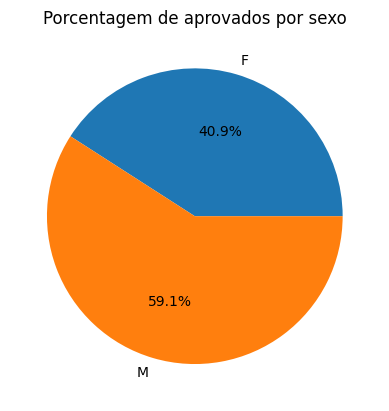

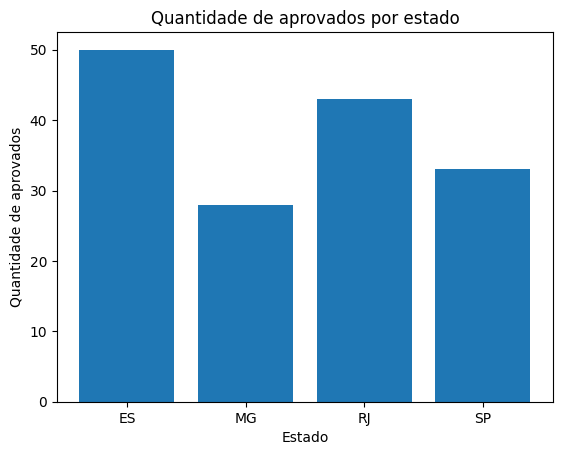

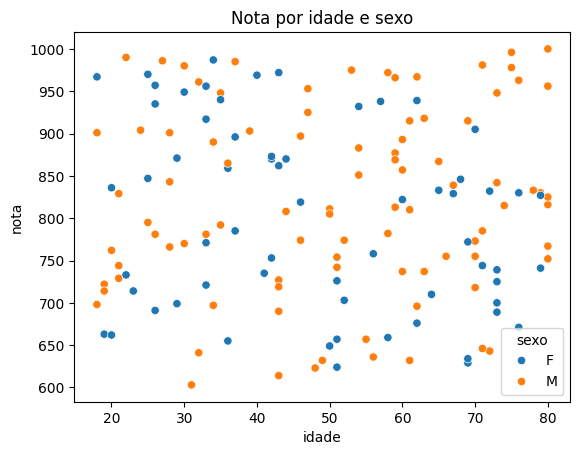

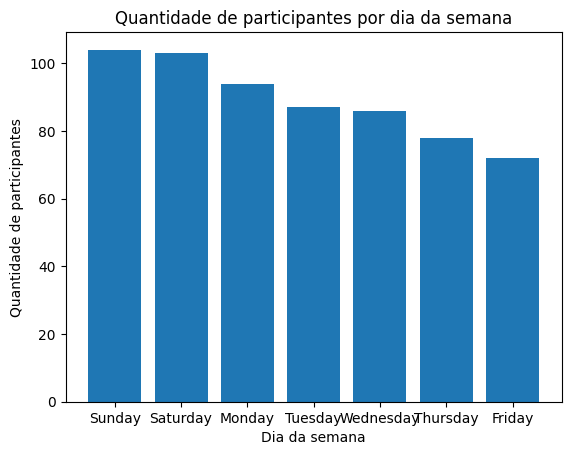

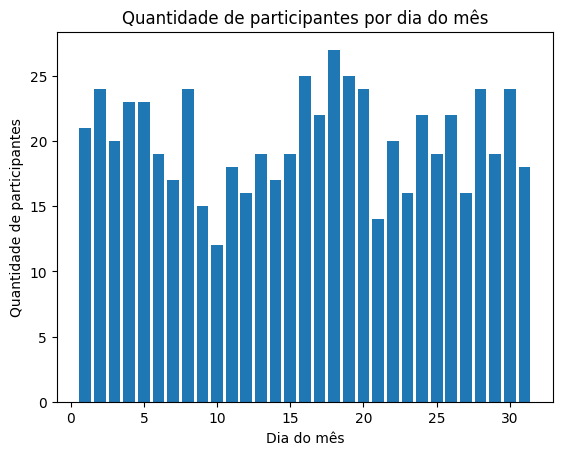

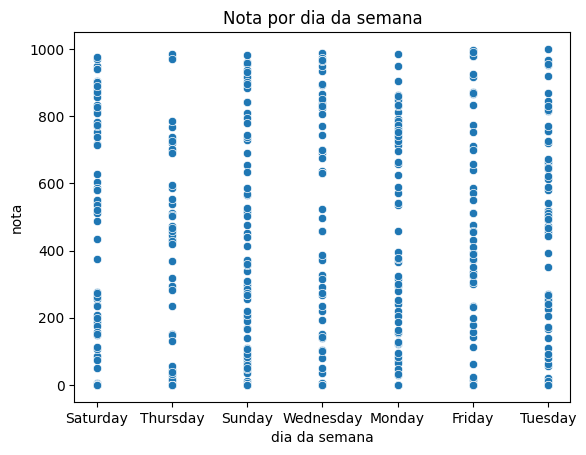

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df.groupby('sexo')['aprovado'].sum(), labels=['F', 'M'], autopct='%1.1f%%')
plt.title('Porcentagem de aprovados por sexo')
plt.show()

plt.bar(df.groupby('estado')['aprovado'].sum().index, df.groupby('estado')['aprovado'].sum())
plt.title('Quantidade de aprovados por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de aprovados')
plt.show()

sns.scatterplot(data=df[df['aprovado']], x='idade', y='nota', hue='sexo')
plt.title('Nota por idade e sexo')
plt.show()

plt.bar(df['dia da semana'].value_counts().index, df['dia da semana'].value_counts())
plt.title('Quantidade de participantes por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Quantidade de participantes')
plt.show()

plt.bar(df['data'].dt.day.value_counts().index, df['data'].dt.day.value_counts())
plt.title('Quantidade de participantes por dia do mês')
plt.xlabel('Dia do mês')
plt.ylabel('Quantidade de participantes')
plt.show()

sns.scatterplot(data=df, x='dia da semana', y='nota')
plt.title('Nota por dia da semana')
plt.show()

**4. Salve um arquivo CSV com as notas dos 100 melhores alunos ordenados da melhor para pior nota removendo a coluna dia da semana e aprovado.**

In [80]:
melhores_indices = df.sort_values('nota', ascending=False).head(100).index
df_melhores = df.loc[melhores_indices]
df_melhores.drop('dia da semana', axis=1, inplace=True)
df_melhores.drop('aprovado', axis=1, inplace=True)
df_melhores

,idade,data,nota,sexo,estado
415,80,2000-01-18,1000.0,M,MG
605,75,2000-01-21,996.0,M,RJ
879,22,2000-01-28,990.0,M,RJ
53,34,2000-01-12,987.0,F,ES
139,27,2000-01-13,986.0,M,ES
...,...,...,...,...,...
477,80,2000-01-13,767.0,M,SP
369,28,2000-01-31,766.0,M,SP
93,20,2000-01-17,762.0,M,ES
905,56,2000-01-24,758.0,F,ES


In [82]:
df_melhores.to_csv('melhores_alunos.csv', index=False)
